# **ANÁLISE EXPLORATÓRIA DOS DADOS DA OMS**

## **Importando os dados**

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pwd

/content


In [ ]:
#lendo o arquivo

from google.colab import files
uploaded = files.upload()
import io
covid = pd.read_csv(io.BytesIO(uploaded['dataset_opas.csv']))

#covid = pd.read_csv('dataset_opas.csv')

covid.head()

Saving dataset_opas.csv to dataset_opas.csv


,Unnamed: 0,title,created,link,summary,full_created,full_content
0,0,Diretora da OPAS pede acesso justo e amplo às ...,7 jul 2021,/pt/noticias/7-7-2021-diretora-da-opas-pede-ac...,A diretora da Organização observou que a Regiã...,2021-07-07T18:26:48+00:00,A diretora da Organização observou que a Regiã...
1,1,Novas recomendações de rastreio e tratamento p...,6 jul 2021,/pt/noticias/6-7-2021-novas-recomendacoes-rast...,6 de julho de 2021 – Muitas mulheres em todo o...,2021-07-06T18:21:48+00:00,6 de julho de 2021 – Muitas mulheres em todo o...
2,2,Ministério da Saúde do Brasil lança Guia de At...,30 jun 2021,/pt/noticias/30-6-2021-ministerio-da-saude-do-...,"No guia, constam recomendações sobre quantidad...",2021-07-01T00:17:45+00:00,"No guia, constam recomendações sobre quantidad..."
3,3,OPAS compartilha experiências no enfrentamento...,30 jun 2021,/pt/noticias/30-6-2021-opas-compartilha-experi...,Equipe de especialistas já esteve nos municípi...,2021-06-30T18:56:10+00:00,Equipe de especialistas já esteve nos municípi...
4,4,Diretora da OPAS reassegura aos países que vac...,30 jun 2021,/pt/noticias/30-6-2021-diretora-da-opas-reasse...,"No entanto, Etienne observou que “muito poucos...",2021-06-30T18:44:46+00:00,"No entanto, Etienne observou que “muito poucos..."


## **Removendo Duplicadas**

In [ ]:
covid['dup'] = covid.drop(columns=['Unnamed: 0']).duplicated(subset=None, keep='first') #cria um coluna de booleanos determinando se tem linhas duplicadas (Tr)

In [ ]:
covid['dup'].sum() #Como a soma é zero, não temos valores duplicados

0

## **Analisando se existem valores vazios**

In [ ]:
covid.drop(columns=['Unnamed: 0']).isnull().sum() #transforma em uma matriz de booleanos verificando se o item da céliula é vazio e depois soma

#Como as somas são zeros, não temos valores vazios

title           0
created         0
link            0
summary         0
full_created    0
full_content    0
dup             0
dtype: int64

## **Carregando as stopwords**

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Acrescentarei manualmente a palavra "sobre" às stop words, pois não é relevante e estava ocorrendo muito

stop_words.add('sobre')

## **Pré processamento dos dados**

In [ ]:
#Criaremos a função para pré processamento dos dados

def preprocess(raw_text):
    
    #Expressão regular para manter apenas letras no texto 
    letters_only_text = re.sub("[^a-zA-ZãõÃÕçÇáéíóúÁÉÍÓÚêÊ]", " ", raw_text) #DUVIDA: COMO RESUMIR ESSE CÓDIGO? OU FIZ CERTO? COMO REMOVER O \n TAMBÉM

    #Converter o texto todo para minúsculo e fazer um split -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    
    #remover stopwords
    for word in words:
      if word not in stop_words:
        cleaned_words.append(word)
    
    #transformar a lista em uma string novamente
    return " ".join(cleaned_words)

In [ ]:
covid['prep'] = covid['full_content'].apply(preprocess) #cria uma nova coluna 'prep' que trará os dados pré processados, removendo pontos e stop words

In [ ]:
covid.iloc[0,8]

'diretora organização observou região ainda notificando metade mortes registradas mundialmente apenas população alguns países américa sul central totalmente vacinada momento washington dc julho opas diretora organização pan americana saúde opas carissa f etienne pediu nesta quarta feira aumento fornecimento vacinas contra covid américas observando milhões pessoas américa latina caribe ainda sabem chance ser imunizadas alguns países américa sul central atingidos pandemia forma particularmente forte ainda capazes acessar vacinas suficientes vacinar totalmente populações afirmou etienne coletiva imprensa semanal opas etienne disse opas pediu s nações vacinas suficientes compartilhassem países américas ainda lutando chamado começando ressoar diretora opas observou doações doses ajudando covax expandir substancialmente disponibilidade vacinas próxima entrega cerca milhões doses provenientes estados unidos milhões japão contribuindo alocação esperada cerca milhões doses embora devamos contar

In [ ]:
covid.iloc[0,6]

'A diretora da Organização observou que a Região ainda está notificando mais da metade das mortes registradas mundialmente, mas apenas 3% da população em alguns países da América do Sul e Central foi totalmente vacinada até o momento\nWashington, DC, 7 de julho de 2021 (OPAS) - A diretora da Organização Pan-Americana da Saúde (OPAS), Carissa F. Etienne, pediu nesta quarta-feira (7) um aumento no fornecimento de vacinas contra a COVID-19 para as Américas, observando que “milhões de pessoas na América Latina e no Caribe ainda não sabem quando terão a chance de ser imunizadas”.\n“Alguns países da América do Sul e Central, atingidos pela pandemia de forma particularmente forte, ainda não foram capazes de acessar vacinas suficientes para vacinar totalmente 3% de suas populações”, afirmou Etienne na coletiva de imprensa semanal da OPAS.\nEtienne disse que “a OPAS pediu às nações com vacinas suficientes para que as compartilhassem com os países das Américas que ainda estão lutando. Esse chama

## **Palavras mais comuns**

In [ ]:
from collections import Counter
Counter(" ".join(covid["prep"]).split()).most_common(10) #Apresenta as 10 palavras mais comuns nos textos

[('saúde', 2512),
 ('países', 1327),
 ('covid', 1261),
 ('opas', 1095),
 ('pessoas', 742),
 ('vacinas', 720),
 ('oms', 715),
 ('pandemia', 680),
 ('casos', 573),
 ('américas', 486)]

In [ ]:
from nltk.util import ngrams


all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in covid["prep"]: 
    tokens = arg.split()  
    all_words += " ".join(tokens)+" "

n_gram = 2
n_gram_dic = dict(Counter(ngrams(all_words.split(), n_gram))) #Cria um ngram de 2 palavras


n_gram_ordenado = []
for i in sorted(n_gram_dic, key = n_gram_dic.get, reverse=True): #Ordena os ngramas do maior para o menor e coloca em uma lista
    n_gram_ordenado.append([i, n_gram_dic[i]])

n_gram_ordenado[:5]



[[('saúde', 'pública'), 270],
 [('contra', 'covid'), 249],
 [('diretora', 'opas'), 243],
 [('profissionais', 'saúde'), 229],
 [('pan', 'americana'), 222]]

## **Manipulando as datas no dataset**

In [ ]:
#Fiz para ver o formato dos meses no dataset

meses = list(covid['created'].apply(lambda x: x.split()).apply(lambda x: x[1]).unique())  #Faz um split em cada célula de data, pega apenas o mês e cria uma lista apenas com os valores únicos
meses


['jul',
 'jun',
 'Maio',
 'abr',
 'mar',
 'fev',
 'jan',
 'dez',
 'nov',
 'out',
 'set',
 'ago']

In [ ]:
mes_ingles = ['July', 'June', 'May', 'April', 'March', 'February', 'January', 'December', 'November', 'October', 'September', 'August']
mudanca_mes = dict(zip(meses,mes_ingles)) #Criei um dicionario que tem o nome do mês em português e seu nome em ingles
mudanca_mes

{'Maio': 'May',
 'abr': 'April',
 'ago': 'August',
 'dez': 'December',
 'fev': 'February',
 'jan': 'January',
 'jul': 'July',
 'jun': 'June',
 'mar': 'March',
 'nov': 'November',
 'out': 'October',
 'set': 'September'}

In [ ]:
datas = list(covid['created'].apply(lambda x: x.split()))

for i in range(0,len(datas)): #Para alterar o mês em Português para inglês
  datas[i][1] = mudanca_mes[datas[i][1]]

datas[:5]


[['7', 'July', '2021'],
 ['6', 'July', '2021'],
 ['30', 'June', '2021'],
 ['30', 'June', '2021'],
 ['30', 'June', '2021']]

In [ ]:
for i in range(0,len(datas)): #Converter as listas da lista maior em strings, para utilizar o strptime
  datas[i] = " ".join(datas[i])

datas[:5]

['7 July 2021', '6 July 2021', '30 June 2021', '30 June 2021', '30 June 2021']

In [ ]:
import datetime as dt
datas_final = []
for i in range(0, len(datas)): #Criando uma lista convertando as strings na lista data em datas (formato datetime)
  datas_final.append(dt.datetime.strptime(datas[i], '%d %B %Y'))


## **Análises**

In [ ]:
#Total de notícias do dataset

print(f'Este dataset possui um total de {len(covid)} notícias.')

Este dataset possui um total de 270 notícias.


In [ ]:
#Timespan do dataset: as notícias vão de quando até quando?

ultima_noticia = dt.datetime.strftime(max(datas_final), '%d/%m/%Y')
primeira_noticia = dt.datetime.strftime(min(datas_final), '%d/%m/%Y')

print(f'As notícias do estudo vão de {primeira_noticia} até {ultima_noticia}')

As notícias do estudo vão de 30/01/2020 até 07/07/2021


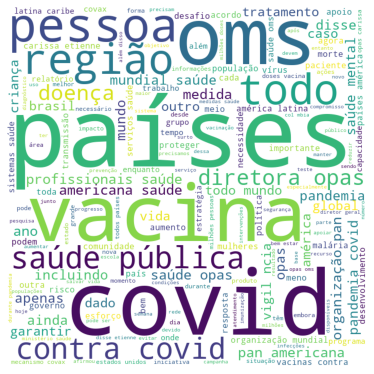

In [ ]:

#nice library to produce wordclouds
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in covid["prep"]: 
    tokens = arg.split()  
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()